## Course Project - Zero To Gans

My course project is about image classification of Cyrillic letters. The base dataset is the CoMNIST dataset, the test data is added by myself.

The model is a CNN model which recognizes pictures and predicts a label.

As I'm learning Russian and have a lot of screenshots on my phone, I wanna build a solution to scan the image folder for pictures which have Cyrillic letters on it and move them to a subfolder or tag them in order to apply filters.

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('16OePaHQul8G30CrIxxD5WuaSoS4WHLAJ')

     |████████████████████████████████| 71kB 5.6MB/s 


In [ ]:
# Import needed libraries
import os
import torch
import torchvision
import tarfile
import zipfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [2]:
# Set project name
project_name='Zerotogans-Project-Final'

In [ ]:
# Download the dataset
dataset_url = "http://ec2-13-58-65-255.us-east-2.compute.amazonaws.com/Cyrillic-letters.zip"
download_url(dataset_url, '.')

# Download my trained model
myModel_url = "http://ec2-13-58-65-255.us-east-2.compute.amazonaws.com/Cyrillic-letter-detection-model.pth"
download_url(myModel_url, '.')

# Extract zip file
with zipfile.ZipFile('./Cyrillic-letters.zip', 'r') as zip:
  zip.extractall(path='./data')

In [ ]:
# Set data dir path
data_dir = './data'
# Show classes and amount of classes
classes = os.listdir(data_dir + "/Cyrillic/train")
print(f'Classes: {classes}')
print(f'Number of classes: {len(classes)}')

Classes: ['О', 'Ъ', 'К', 'В', 'Л', 'Ф', 'Й', 'Ь', 'М', 'Т', 'Ю', 'Ч', 'У', 'Ц', 'Б', 'Е', 'I', 'Ё', 'Э', 'Д', 'Н', 'С', 'Х', 'А', 'З', 'Ы', 'Я', 'И', 'Ж', 'Щ', 'Р', 'П', 'Г', 'Ш']
Number of classes: 34


In [ ]:
# Image check
Д = os.listdir(data_dir + "/Cyrillic/train/Д")
print('No. of training examples for Д:', len(Д))
print(Д[:5])

Й = os.listdir(data_dir + "/Cyrillic/train/Й")
print('No. of training examples for Й:', len(Й))
print(Й[:5])

No. of training examples for Д: 465
['58be8bdfc97ef.png', '58c290fd99126.png', '58bee31d5520c.png', '5a524a7356f63.png', '5a087d51356d9.png']
No. of training examples for Й: 466
['58c6d96ace649.png', '58befb568d92f.png', '58c1be3087123.png', '58c30f541f509.png', '58be8b00b677d.png']


In [ ]:
# Import needed libraries for dataset creation
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt

In [ ]:
# Definition of train and test transformations
train_tfms = tt.Compose(
        [tt.Grayscale(num_output_channels=1),
         tt.RandomCrop(32, padding=4, padding_mode='reflect'),
         #tt.RandomHorizontalFlip(), # contra prductive for letter classification
         tt.ToTensor()])
test_tfms = tt.Compose(
        [tt.Grayscale(num_output_channels=1),
         tt.ToTensor()])

In [ ]:
# Create train dataset
dataset = ImageFolder(data_dir+'/Cyrillic/train', transform=train_tfms)

In [ ]:
# Check first dataset element
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([1, 32, 32]) 0


tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [ ]:
# Show dataset classes and amount of classes
print(dataset.classes)
len(classes)

['I', 'Ё', 'А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ж', 'З', 'И', 'Й', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я']


34

In [ ]:
# Import needed libraries for letter visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
# Create show function to view sample images
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img[0])

Label:  I (0)


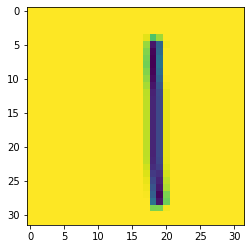

In [ ]:
# Show sample image, first image of the dataset
show_example(*dataset[0])

Label:  Б (3)


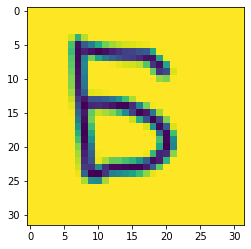

In [ ]:
# Show sample image, image 1098 of the dataset
show_example(*dataset[1098])

In [5]:
# Save project
!pip install jovian --upgrade -q
import jovian
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/danieldownload/zerotogans-project-final


'https://jovian.ai/danieldownload/zerotogans-project-final'

In [ ]:
# Set seed for rundom number generation
random_seed = 42
torch.manual_seed(random_seed);

In [ ]:
# Set validation dataset size and create the train and validation dataset
val_size = 100
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(15378, 100)

In [ ]:
# Log dataset information
jovian.log_dataset(dataset_url=dataset_url, val_size=val_size, random_seed=random_seed)

[jovian] Dataset logged.


In [ ]:
# Import needed libraries for dataloaders and set batch size
from torch.utils.data.dataloader import DataLoader
batch_size=300

In [ ]:
# Create train and validation dataloader
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [ ]:
# Import needed libraries to create an image example grid
from torchvision.utils import make_grid
# Define function to create an image grid which shows sample images, based on the dataset
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

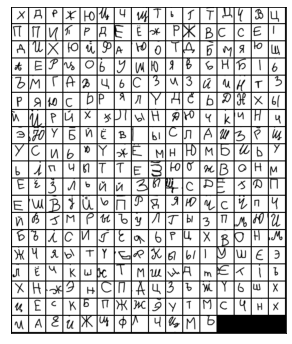

In [ ]:
# Show image grid (takes a bit to generate...)
show_batch(train_dl)

In [ ]:
# Save current project progress
jovian.commit(project=project_name, environment=None)

In [ ]:
# Import needed libraries for ml
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Model definition, class ImageClassificationBase contains helper methods for training and validation. That class extends the nn.Module class.
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
# Model definition, class CyrilliclettersModel contains layer chaining and activations functions, nn.Sequential is used. That class extends our ImageClassificationBase class.
class CyrilliclettersModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 34))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
# Initiate the model
model = CyrilliclettersModel()
#model

In [ ]:
# Model verification, a batch of training data is given to see if it generates the output as expected. It gives an output of 34 probabilities, each output
# stands for a letter, the highest output stands for the predicted label.
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([300, 1, 32, 32])
out.shape: torch.Size([300, 34])
out[0]: tensor([-0.0086,  0.0395,  0.0516, -0.0055, -0.0139,  0.0310, -0.0214,  0.0228,
         0.0292,  0.0055, -0.0197, -0.0021,  0.0012, -0.0074, -0.0194, -0.0288,
        -0.0041, -0.0083,  0.0338, -0.0081,  0.0476, -0.0219,  0.0422,  0.0123,
         0.0300,  0.0515,  0.0337, -0.0069, -0.0189,  0.0031,  0.0094,  0.0436,
         0.0051, -0.0039], grad_fn=<SelectBackward>)


In [ ]:
# Define helper functions for GPU use
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
# Check which device is available, cuda stands for Nvidia graphic card existence
device = get_default_device()
device

device(type='cuda')

In [ ]:
# Wrap train and validation dataloader to use DeviceDataLoader if GPU is available, then use to_device to move the model to GPU
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [ ]:
# Save current project progress
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/danieldownload/zerotogans-project


'https://jovian.ai/danieldownload/zerotogans-project'

In [ ]:
# Define evaluate function to mesure the validation set performance
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

# Define fit function to train the model using gradiant descent
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
# Initiate model again to see the performance, using the initial set of parameters
model = to_device(CyrilliclettersModel(), device)

In [ ]:
# Show performance, using the initial set of parameters
evaluate(model, val_dl)

{'val_acc': 0.05000000074505806, 'val_loss': 3.5263094902038574}

In [ ]:
# Set hyperparameters for training
num_epochs = 2
opt_func = torch.optim.Adam
lr = 0.00001

In [ ]:
# Record hyperparameters
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Hyperparams logged.


In [ ]:
# Train the model
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.2070, val_loss: 0.1702, val_acc: 0.9700
Epoch [1], train_loss: 0.1769, val_loss: 0.1525, val_acc: 0.9600


In [ ]:
# Record the achieved metrics
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


In [ ]:
# Define function to visualize the model accuracy
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

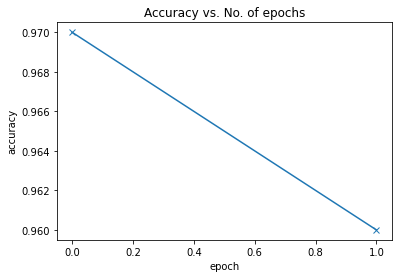

In [ ]:
# Show model accuracy
plot_accuracies(history)

In [ ]:
# Define function to visualize training and validation losses
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

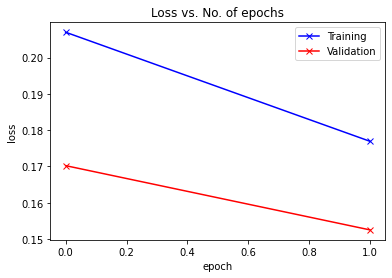

In [ ]:
# Show losses
plot_losses(history)

In [ ]:
# Save current project progress
jovian.commit(project=project_name)

In [ ]:
# Create test dataset
test_dataset = ImageFolder(data_dir+'/Cyrillic/test', transform=test_tfms)

In [ ]:
# Define prediction function which reads test images and predicts the lables
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: З , Predicted: З


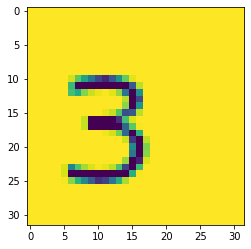

In [ ]:
# Show test image and predicted label
img, label = test_dataset[9]
plt.imshow(img[0])
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Г , Predicted: Г


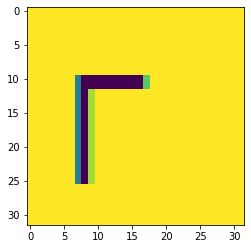

In [ ]:
# Show test image and predicted label
img, label = test_dataset[5]
plt.imshow(img[0])
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: О , Predicted: О


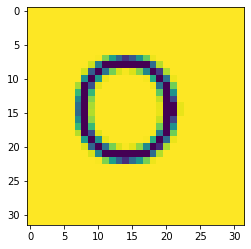

In [ ]:
# Show test image and predicted label
img, label = test_dataset[16]
plt.imshow(img[0])
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Б , Predicted: Б


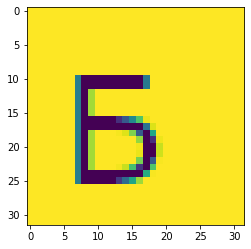

In [ ]:
# Show test image and predicted label
img, label = test_dataset[3]
plt.imshow(img[0])
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: А , Predicted: Д


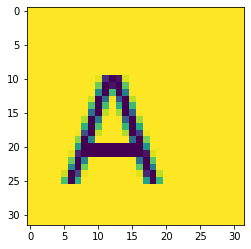

In [ ]:
# Show test image and predicted label - this prediction is wrong!
img, label = test_dataset[2]
plt.imshow(img[0])
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
# Show overall loss and accuracy of the model
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.9375, 'val_loss': 0.27402806282043457}

In [ ]:
# Log overall loss and accuracy
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


In [ ]:
# Save the model
torch.save(model.state_dict(), 'Cyrillic-letter-detection-model.pth')

In [ ]:
# Load model back
model_Cldm_final = to_device(CyrilliclettersModel(), device)
model_Cldm_final.load_state_dict(torch.load('Cyrillic-letter-detection-model.pth'))

<All keys matched successfully>

In [ ]:
model_Cldm_final.load_state_dict(torch.load('Cyrillic-letter-detection-model.pth'))

<All keys matched successfully>

In [ ]:
# Check if model has been loaded correctly
evaluate(model_Cldm_final, test_loader)

{'val_acc': 0.9375, 'val_loss': 0.27402806282043457}

In [4]:
# Save project finally
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/danieldownload/zerotogans-project-final


'https://jovian.ai/danieldownload/zerotogans-project-final'

# Conclusion

The model fits fine for my needs in order to recognize picturs which have cyrillic letters on it. Next step is to find out, how to send real world pictures "through" the model.

So far I learned sooo much about ml and I'm definitly continue that path.

I come from the field of computer network security and my main goal is to utilize ml for finding anomalies in computer networks to make them more secure.